In [1]:
# IMPORTS
import requests
import json
from sportmonks.soccer import SoccerApiV2
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, log_loss
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
import xlsxwriter
import excel2json
from datetime import datetime
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

//anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
//anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [8]:
ajax = pd.read_json("Sheet1.json")
# print(ajax)

X = ajax.drop('Injured', axis = 1)
Y = pd.factorize(ajax.Injured)[0].reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

ohe = OneHotEncoder()

ohe.fit(X_train)
X_train_ohe = ohe.transform(X_train).toarray()

ohe_df = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names(X_train.columns))




In [9]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train_ohe, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [10]:
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

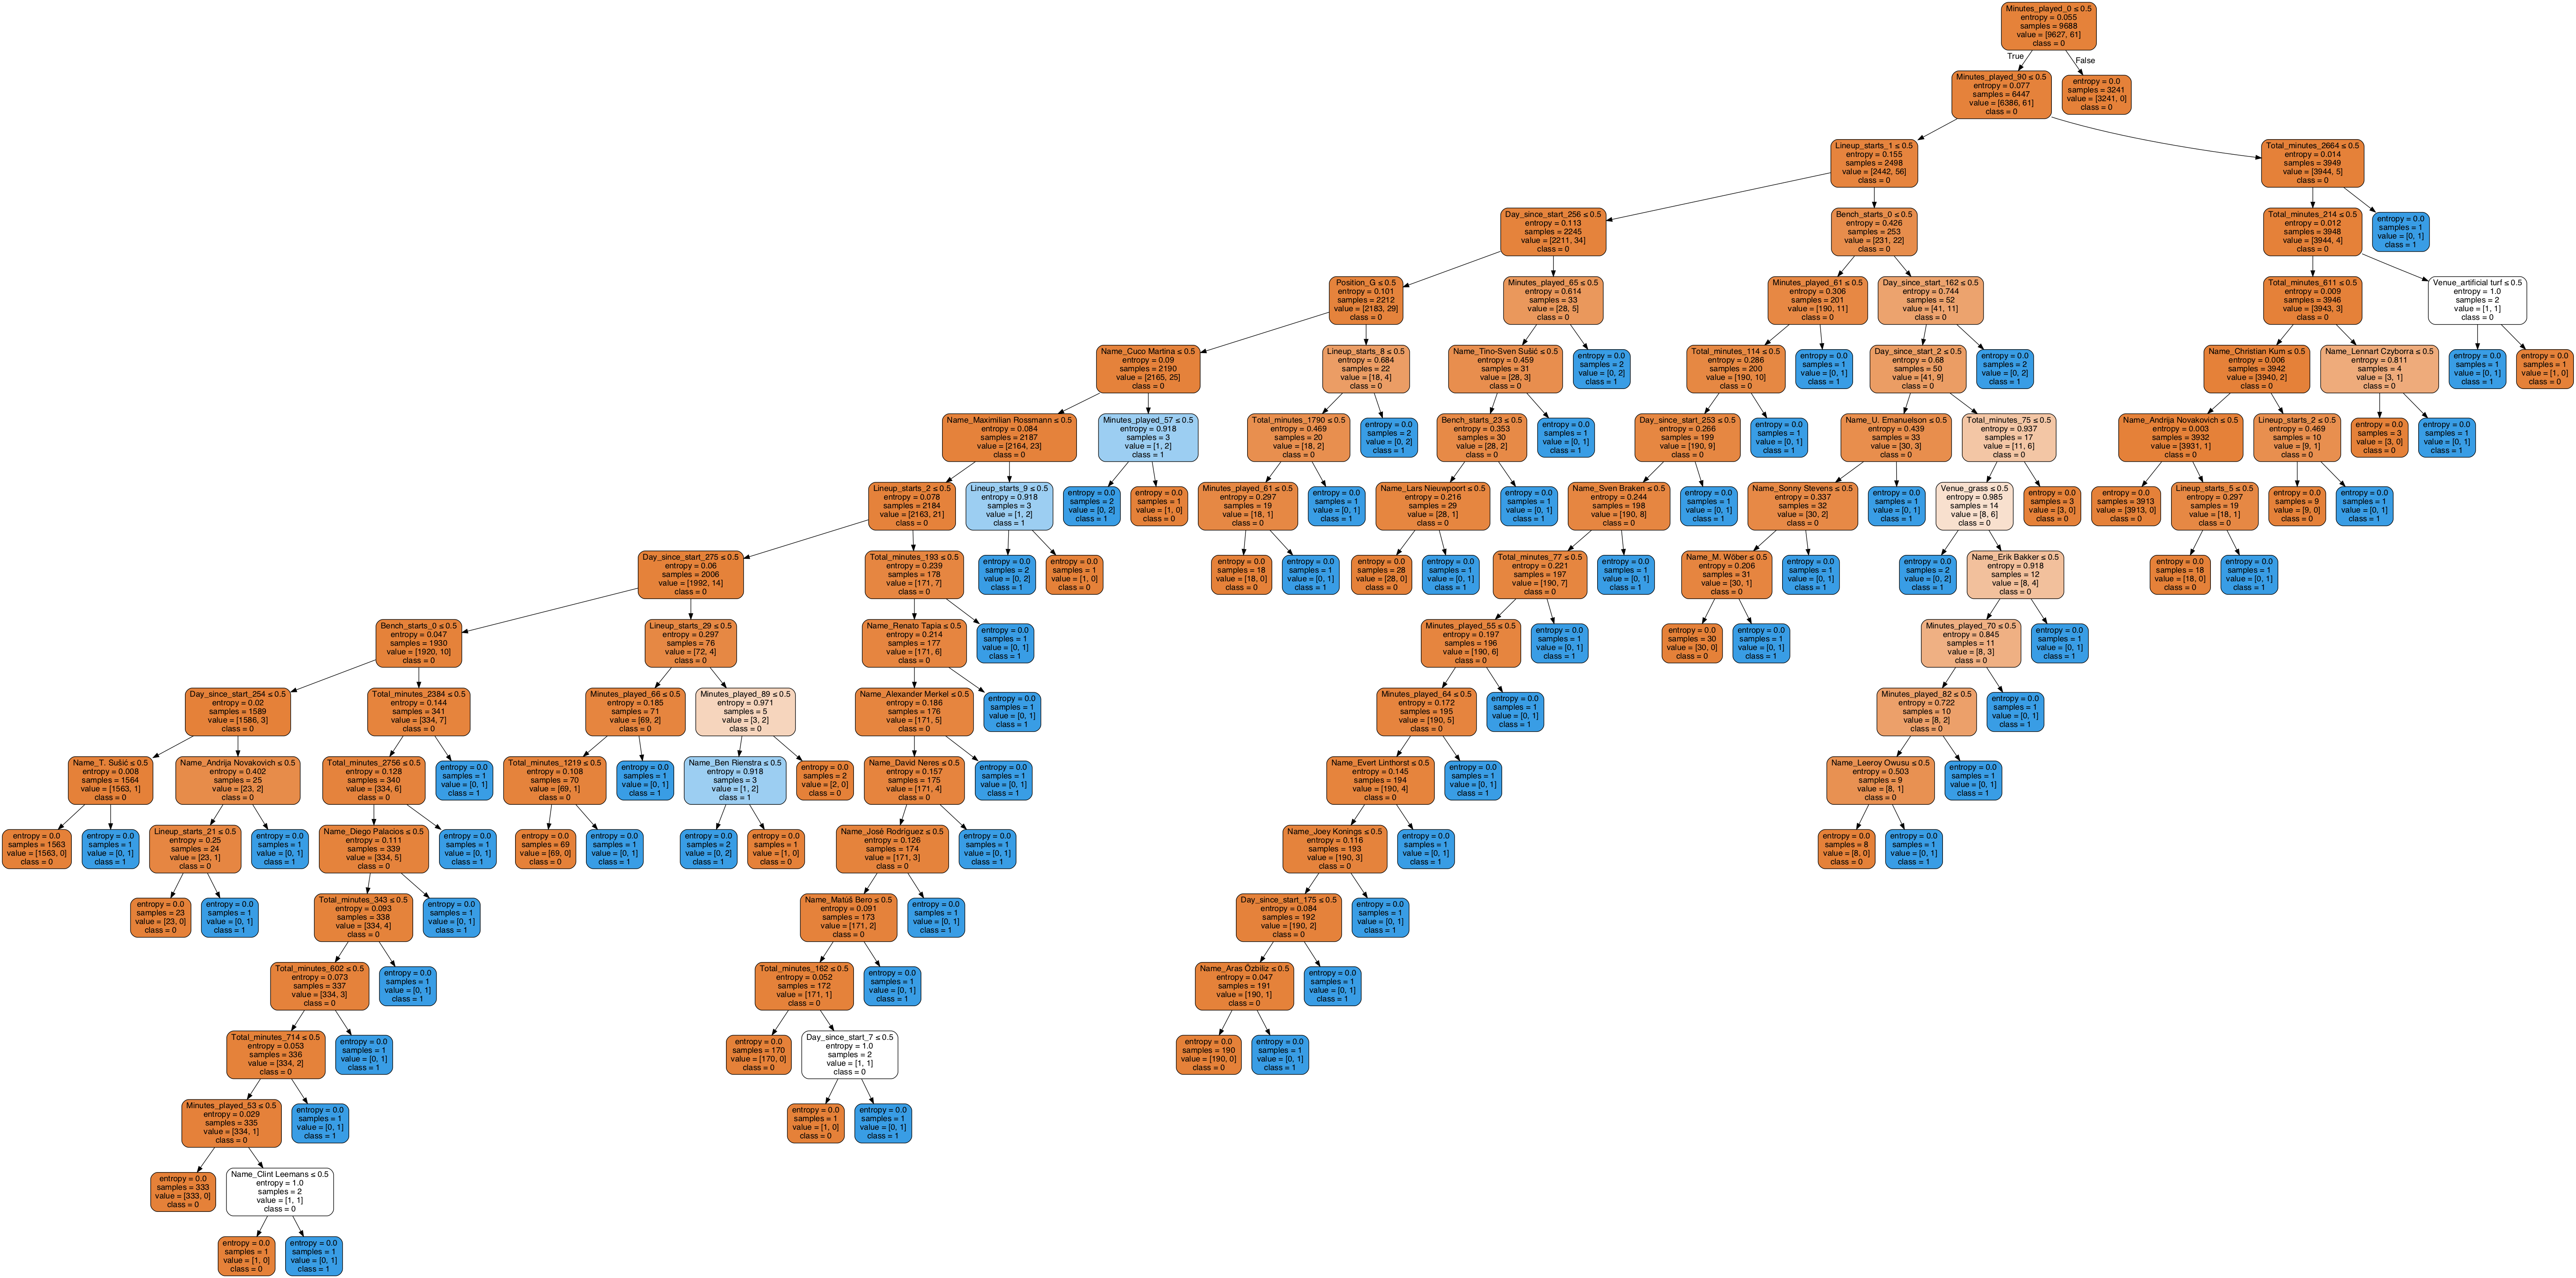

In [13]:
from pydotplus import graph_from_dot_data

dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=ohe_df.columns,  
                           class_names=np.unique(Y).astype('str'), 
                           filled=True, rounded=True, special_characters=True)

# Draw graph
graph = graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

ValueError: could not convert string to float: 'Luciano Slagveer'

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(onehotlabels_x, onehotlabels_y, test_size=0.2)
# X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [18]:
ajax = pd.read_json("Sheet1.json")
# print(ajax)

# X = ajax.drop('Injured', axis = 1)
# Y = pd.factorize(ajax.Injured)[0].reshape(-1, 1)

orig = pd.factorize(ajax.Injured)[0].reshape(-1, 1)

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

encoded = enc.fit_transform(orig)
decoded = encoded.dot(ohe.active_features_).astype(int)
assert np.allclose(orig, decode)




AttributeError: 'OneHotEncoder' object has no attribute 'active_features_'